## **Project: Study On Panel Data Methodologies With Application To Macroeconometrics (Inflation Forecasting)**.

> ### **Title**: Merge of Dataset.


#### **Table of Contents:**
<ul>
<li><a href="#1">1. .</a></li>
<li><a href="#2">2. .</a></li>
<li><a href="#3">3. .</a></li>
</ul>

<a id=''></a>

#### Final Dataset Table:

- > E. Table for data values `WEO_Data_Countries` name Columns {'WEO_Country_Code', 'Country', 'Advanced_Country', 'Years' , and all Varibles 'WEO_Subject_Code' {'BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGX_NGDP', 'GGXWDG_NGDP', 'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PCPIPCH', 'PPPEX', 'PPPPC', 'PPPSH', 'TM_RPCH', 'TRWMA', 'TX_RPCH'} }

In [2]:
# install 
#!pip install pandas linearmodels statsmodels matplotlib seaborn


**Import Library**

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math

import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects, compare


sns.set(rc={'figure.figsize': [15,5]}, font_scale=1.2);
pd.set_option('future.no_silent_downcasting', True)


**Load Dataset**

In [10]:
df = pd.read_csv("../03-Dataset/01-Data_Clean.csv")
print(df.shape)
display(df.head())

(1750, 20)


,WEO_Country_Code,Country,Advanced_Country,Year,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PCPIPCH,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH
0,213,Argentina,0,2000,-2.878,21.830,-4.552,40.833,25.247,17.134,-0.789,12.459,15.337,-0.939,0.639,13529.290,0.995,-2.322,10.52,1.898
1,213,Argentina,0,2001,-1.316,21.068,-5.590,48.007,26.432,19.209,-4.409,12.325,13.640,-1.065,0.618,13091.488,0.929,-16.587,9.25,6.096
2,213,Argentina,0,2002,7.666,19.943,1.188,147.203,21.853,22.450,-10.894,17.631,9.965,25.869,0.794,11733.021,0.806,-53.558,12.01,0.244
3,213,Argentina,0,2003,5.597,23.526,3.453,125.162,22.026,17.250,8.955,18.474,12.877,13.443,0.859,12914.244,0.847,48.953,12.87,5.006
4,213,Argentina,0,2004,1.798,26.996,4.719,117.878,23.030,13.625,8.911,19.350,17.551,4.416,0.887,14308.616,0.878,51.050,5.96,-0.150


In [11]:
df.drop(columns=[ "WEO_Country_Code"],inplace=True)
panel_df = df.set_index(['Country', 'Year'])
panel_df.head()

Advanced_Country  BCA_NGDPD  GGR_NGDP  GGSB_NPGDP  \
Country   Year                                                      
Argentina 2000                 0     -2.878    21.830      -4.552   
          2001                 0     -1.316    21.068      -5.590   
          2002                 0      7.666    19.943       1.188   
          2003                 0      5.597    23.526       3.453   
          2004                 0      1.798    26.996       4.719   

                GGXWDG_NGDP  GGX_NGDP     LUR  NGDP_RPCH  NGSD_NGDP  NID_NGDP  \
Country   Year                                                                  
Argentina 2000       40.833    25.247  17.134     -0.789     12.459    15.337   
          2001       48.007    26.432  19.209     -4.409     12.325    13.640   
          2002      147.203    21.853  22.450    -10.894     17.631     9.965   
          2003      125.162    22.026  17.250      8.955     18.474    12.877   
          2004      117.878    23.030  13.625      8.911     19.350    17.551   

                PCPIPCH  PPPEX      PPPPC  PPPSH  TM_RPCH  TRWMA  TX_RPCH  
Country   Year                                                             
Argentina 2000   -0.939  0.639  13529.290  0.995   -2.322  10.52    1.898  
          2001   -1.065  0.618  13091.488  0.929  -16.587   9.25    6.096  
          2002   25.869  0.794  11733.021  0.806  -53.558  12.01    0.244  
          2003   13.443  0.859  12914.244  0.847   48.953  12.87    5.006  
          2004    4.416  0.887  14308.616  0.878   51.050   5.96   -0.150

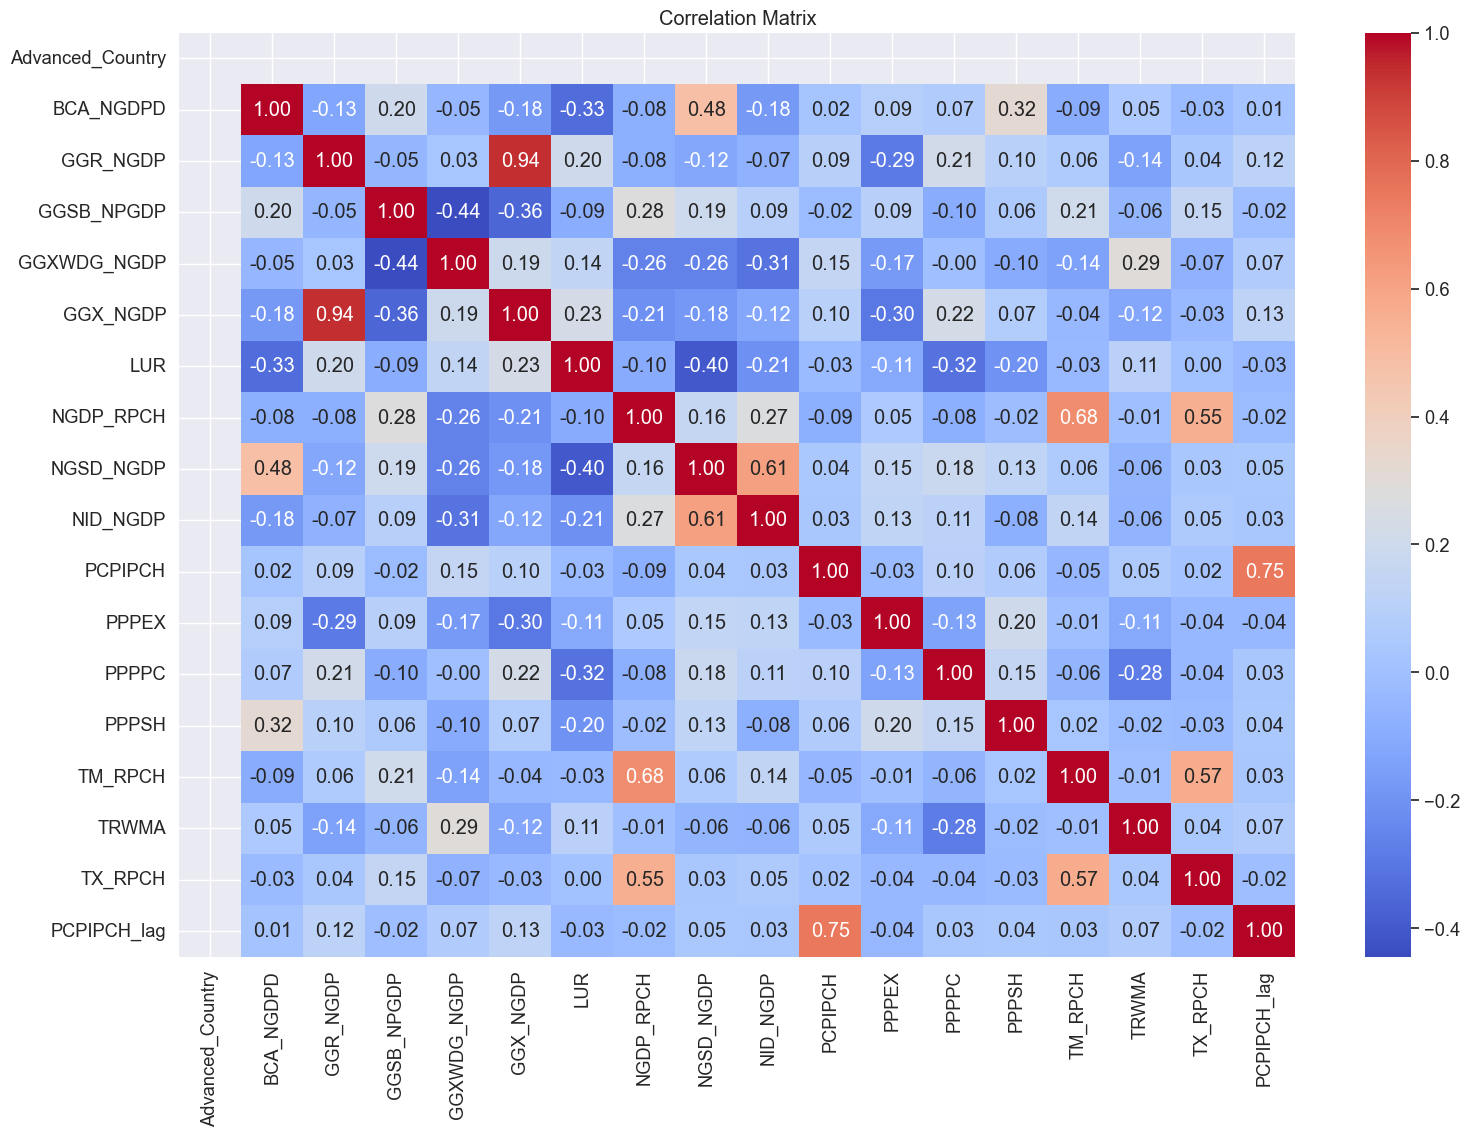

In [38]:

corr_matrix = panel_df[panel_df["Advanced_Country"]==0].corr()

# رسم heatmap
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()


In [13]:
panel_df['PCPIPCH_lag'] = panel_df.groupby(level=0)['PCPIPCH'].shift(1)
panel_df = panel_df.dropna(subset=['PCPIPCH_lag'])
panel_df.head()

Advanced_Country  BCA_NGDPD  GGR_NGDP  GGSB_NPGDP  \
Country   Year                                                      
Argentina 2001                 0     -1.316    21.068      -5.590   
          2002                 0      7.666    19.943       1.188   
          2003                 0      5.597    23.526       3.453   
          2004                 0      1.798    26.996       4.719   
          2005                 0      2.473    27.766       4.376   

                GGXWDG_NGDP  GGX_NGDP     LUR  NGDP_RPCH  NGSD_NGDP  NID_NGDP  \
Country   Year                                                                  
Argentina 2001       48.007    26.432  19.209     -4.409     12.325    13.640   
          2002      147.203    21.853  22.450    -10.894     17.631     9.965   
          2003      125.162    22.026  17.250      8.955     18.474    12.877   
          2004      117.878    23.030  13.625      8.911     19.350    17.551   
          2005       80.282    24.426  11.575      8.852     21.362    18.888   

                PCPIPCH  PPPEX      PPPPC  PPPSH  TM_RPCH  TRWMA  TX_RPCH  \
Country   Year                                                              
Argentina 2001   -1.065  0.618  13091.488  0.929  -16.587   9.25    6.096   
          2002   25.869  0.794  11733.021  0.806  -53.558  12.01    0.244   
          2003   13.443  0.859  12914.244  0.847   48.953  12.87    5.006   
          2004    4.416  0.887  14308.616  0.878   51.050   5.96   -0.150   
          2005    9.642  0.949  15911.199  0.913   18.243   5.22   11.583   

                PCPIPCH_lag  
Country   Year               
Argentina 2001       -0.939  
          2002       -1.065  
          2003       25.869  
          2004       13.443  
          2005        4.416

In [33]:

y = panel_df['PCPIPCH']
X = panel_df[['BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGXWDG_NGDP', 'GGX_NGDP',
              'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PPPEX', 'PPPPC', 'PPPSH',
              'TM_RPCH', 'TRWMA', 'TX_RPCH', "PCPIPCH_lag"]]

X = sm.add_constant(X)

#(Fixed Effects)
model_fe = PanelOLS(y, X, entity_effects=True)
results_fe = model_fe.fit()
print("Fixed Effects Model Results")
print(results_fe.summary)

Fixed Effects Model Results
                          PanelOLS Estimation Summary                           
Dep. Variable:                PCPIPCH   R-squared:                        0.4894
Estimator:                   PanelOLS   R-squared (Between):              0.3096
No. Observations:                1680   R-squared (Within):               0.4894
Date:                Mon, May 19 2025   R-squared (Overall):              0.4321
Time:                        22:50:56   Log-likelihood                   -5309.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      95.503
Entities:                          70   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                 F(16,1594)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             95.503


In [ ]:

y = panel_df['PCPIPCH']
X = panel_df[['Advanced_Country', 'BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGXWDG_NGDP', 'GGX_NGDP',
              'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PPPEX', 'PPPPC', 'PPPSH',
              'TM_RPCH', 'TRWMA', 'TX_RPCH', "PCPIPCH_lag"]]

# X = sm.add_constant(X)

model_fe = PanelOLS(y, X)
results_fe = model_fe.fit()
print("Fixed Effects Model Results")
print(results_fe.summary)

Fixed Effects Model Results
                          PanelOLS Estimation Summary                           
Dep. Variable:                PCPIPCH   R-squared:                        0.6789
Estimator:                   PanelOLS   R-squared (Between):              0.9234
No. Observations:                1680   R-squared (Within):               0.4708
Date:                Mon, May 19 2025   R-squared (Overall):              0.6789
Time:                        22:50:57   Log-likelihood                   -5437.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      206.85
Entities:                          70   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                 F(17,1663)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             206.85


In [25]:
y = panel_df['PCPIPCH']
X = panel_df[['Advanced_Country','BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGXWDG_NGDP', 'GGX_NGDP',
              'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PPPEX', 'PPPPC', 'PPPSH',
              'TM_RPCH', 'TRWMA', 'TX_RPCH', "PCPIPCH_lag"]]


# (Random Effects)
model_re = RandomEffects(y, X)
results_re = model_re.fit()
print("\nRandom Effects Model Results")
print(results_re.summary)



Random Effects Model Results
                        RandomEffects Estimation Summary                        
Dep. Variable:                PCPIPCH   R-squared:                        0.6189
Estimator:              RandomEffects   R-squared (Between):              0.9116
No. Observations:                1680   R-squared (Within):               0.4784
Date:                Mon, May 19 2025   R-squared (Overall):              0.6776
Time:                        22:44:31   Log-likelihood                   -5393.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      158.86
Entities:                          70   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                 F(17,1663)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             158.8

In [ ]:
from linearmodels.panel import compare

comparison = compare({'FE': results_fe, 'RE': results_re})
print(comparison)


                 Model Comparison                 
                                FE              RE
--------------------------------------------------
Dep. Variable              PCPIPCH         PCPIPCH
Estimator                 PanelOLS   RandomEffects
No. Observations              1680            1680
Cov. Est.               Unadjusted      Unadjusted
R-squared                   0.6789          0.6189
R-Squared (Within)          0.4708          0.4784
R-Squared (Between)         0.9234          0.9116
R-Squared (Overall)         0.6789          0.6776
F-statistic                 206.85          158.86
P-value (F-stat)            0.0000          0.0000
===================== ============ ===============
Advanced_Country           -2.0761         -2.4528
                         (-4.1990)       (-4.1271)
BCA_NGDPD                  -0.0665         -0.0801
                         (-1.1312)       (-1.3298)
GGR_NGDP                    0.1577          0.1870
                          (2.55

In [29]:
from linearmodels.panel import PooledOLS

pooled_ols = PooledOLS(y, X)
pooled_ols_results = pooled_ols.fit()
print(pooled_ols_results.summary)


                          PooledOLS Estimation Summary                          
Dep. Variable:                PCPIPCH   R-squared:                        0.6789
Estimator:                  PooledOLS   R-squared (Between):              0.9234
No. Observations:                1680   R-squared (Within):               0.4708
Date:                Mon, May 19 2025   R-squared (Overall):              0.6789
Time:                        22:48:06   Log-likelihood                   -5437.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      206.85
Entities:                          70   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                 F(17,1663)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             206.85
                            

In [30]:
from linearmodels.panel import RandomEffects

random_effects = RandomEffects(y, X)
random_effects_results = random_effects.fit()
print(random_effects_results.summary)


                        RandomEffects Estimation Summary                        
Dep. Variable:                PCPIPCH   R-squared:                        0.6189
Estimator:              RandomEffects   R-squared (Between):              0.9116
No. Observations:                1680   R-squared (Within):               0.4784
Date:                Mon, May 19 2025   R-squared (Overall):              0.6776
Time:                        22:48:07   Log-likelihood                   -5393.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      158.86
Entities:                          70   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                 F(17,1663)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             158.86
                            

In [32]:
from linearmodels.panel import compare

comparison = compare({'Fixed Effects': fixed_effects_results, 'Random Effects': random_effects_results})
print(comparison)


NameError: name 'fixed_effects_results' is not defined

In [11]:
import numpy as np

b = fixed_effects_results.params.values
B = random_effects_results.params.values
V_b = fixed_effects_results.cov
V_B = random_effects_results.cov
diff = b - B
diff_var = V_b - V_B
from scipy.stats import chi2
stat = np.dot(diff.T, np.linalg.inv(diff_var).dot(diff))
df = diff.shape[0]
p_value = 1 - chi2.cdf(stat, df)
print(f"Hausman test statistic: {stat}, p-value: {p_value}")


Hausman test statistic: 91.4344368560318, p-value: 5.35238520171788e-13


In [19]:
from linearmodels.panel import FirstDifferenceOLS

# إضافة المتغير المؤخر (lagged variable)
panel_df['PCPIPCH_lag'] = panel_df.groupby(level=0)['PCPIPCH'].shift(1)
panel_df = panel_df.dropna(subset=['PCPIPCH_lag'])
panel_df.head()

BCA_NGDPD  GGR_NGDP  GGSB_NPGDP  GGXWDG_NGDP  GGX_NGDP  \
Advanced_Country Year                                                           
0                2001     -1.316    21.068      -5.590       48.007    26.432   
                 2002      7.666    19.943       1.188      147.203    21.853   
                 2003      5.597    23.526       3.453      125.162    22.026   
                 2004      1.798    26.996       4.719      117.878    23.030   
                 2005      2.473    27.766       4.376       80.282    24.426   

                          LUR  NGDP_RPCH  NGSD_NGDP  NID_NGDP  PCPIPCH  PPPEX  \
Advanced_Country Year                                                           
0                2001  19.209     -4.409     12.325    13.640   -1.065  0.618   
                 2002  22.450    -10.894     17.631     9.965   25.869  0.794   
                 2003  17.250      8.955     18.474    12.877   13.443  0.859   
                 2004  13.625      8.911     19.350    17.551    4.416  0.887   
                 2005  11.575      8.852     21.362    18.888    9.642  0.949   

                           PPPPC  PPPSH  TM_RPCH  TRWMA  TX_RPCH  PCPIPCH_lag  
Advanced_Country Year                                                          
0                2001  13091.488  0.929  -16.587   9.25    6.096       -0.939  
                 2002  11733.021  0.806  -53.558  12.01    0.244       -1.065  
                 2003  12914.244  0.847   48.953  12.87    5.006       25.869  
                 2004  14308.616  0.878   51.050   5.96   -0.150       13.443  
                 2005  15911.199  0.913   18.243   5.22   11.583        4.416

In [20]:

fd_model = FirstDifferenceOLS(y_dyn, X_dyn)
fd_results = fd_model.fit()
print(fd_results.summary)


ValueError: cannot handle a non-unique multi-index!

In [21]:
print(panel_df.index.is_unique)
print(panel_df.index)


False
MultiIndex([(0, 2001),
            (0, 2002),
            (0, 2003),
            (0, 2004),
            (0, 2005),
            (0, 2006),
            (0, 2007),
            (0, 2008),
            (0, 2009),
            (0, 2010),
            ...
            (1, 2015),
            (1, 2016),
            (1, 2017),
            (1, 2018),
            (1, 2019),
            (1, 2020),
            (1, 2021),
            (1, 2022),
            (1, 2023),
            (1, 2024)],
           names=['Advanced_Country', 'Year'], length=1748)


<a id='1'></a>

### **1. :**

<a id='2'></a>

### **2. :**

<a id='3'></a>

### **3. Apply the interpolation to Missing Values:**

# **END**